<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/07-Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:

X1 = 'Course'
Y1 = 'GDP'
useColumns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target'
]

In [82]:
import pandas as pd

home_data = pd.read_csv('dataAlter.csv')
home_data.head()


AttributeError: 'DataFrame' object has no attribute 'data'

In [27]:
print(X1)

Application order


<Axes: xlabel='Course', ylabel='GDP'>

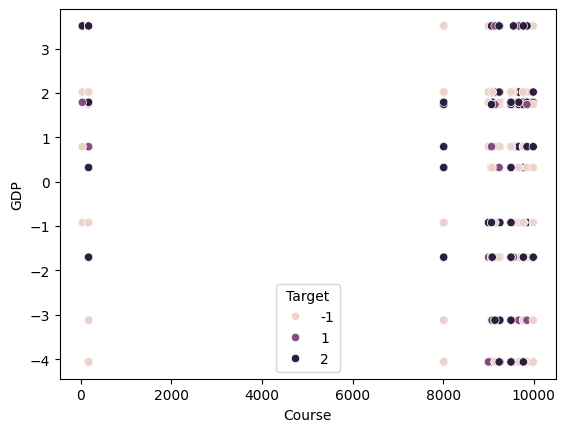

In [41]:
import seaborn as sns

sns.scatterplot(data = home_data, x = X1 , y = Y1, hue = 'Target')

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[useColumns], home_data[['Target']], test_size=0.33, random_state=0)

In [73]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [78]:
from sklearn.datasets import load_iris # Dataset
from sklearn.decomposition import PCA # Algorithm
import matplotlib.pyplot as plt # Visualization

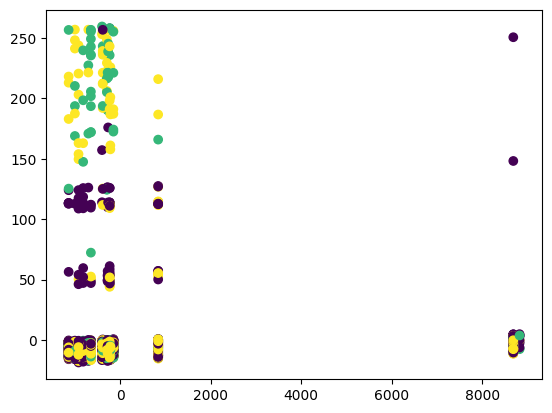

In [88]:
# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Train the model
pca.fit(home_data)
home_data_reduced = pca.fit_transform(home_data)

# Plot data
plt.scatter(
    home_data_reduced[:,0],
    home_data_reduced[:,1],
    c=home_data.Target,
    cmap='viridis'
)
plt.show()

<Axes: xlabel='Course', ylabel='GDP'>

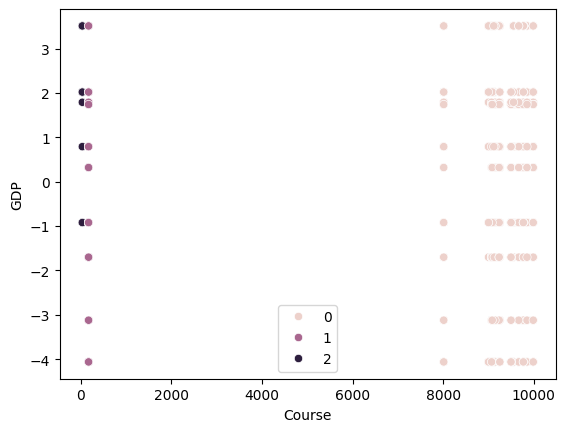

In [75]:
sns.scatterplot(data = X_train, x = X1, y = Y1, hue = kmeans.labels_)

<Axes: ylabel='Target'>

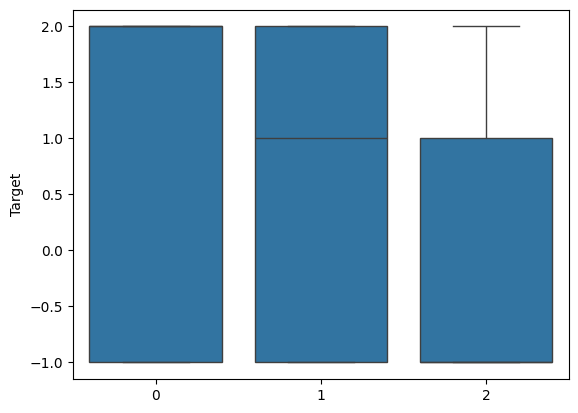

In [76]:
sns.boxplot(x = kmeans.labels_, y = y_train['Target'])

In [77]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.9742271227403609